## Random Forest

#### Table of Contents

- [Preliminaries](#Preliminaries)
- [Null Model](#Null-Model)
- [Decision Tree](#Decision-Tree)
- [Bagging](#Bagging)
- [Random Forest](#Random-Forest)
- [Comparison](#Comparison)

First, let's create some functions to help us in the future.

In [1]:
%run metrics.py

In [2]:
%whos

Variable   Type        Data/Info
--------------------------------
acc        function    <function acc at 0x000001EA80122160>
rmse       function    <function rmse at 0x000001EA801221F0>


***********
# Preliminaries
[TOP](#Random-Forest)

We will be comparing three models predicting the label `urate_bin`

1. decision tree
2. bagged decision trees
3. random forest

Loading the packages and prepping the data.

In [6]:
# utilties
import pandas as pd

# processing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

# alogrithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_pickle('C:/Users/johnj/Documents/Data/aml in econ 02 spring 2021/class data/class_data.pkl')

In [8]:
y = df['urate_bin'].astype('category')
x = df.drop(columns = 'urate_bin')

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   train_size = 2/3,
                                                   random_state = 490)

****
# Null Model
[TOP](#Random-Forest)

In [10]:
yhat_null = y_train.value_counts().index[0]
acc_null = acc(yhat_null, y_test)
acc_null

0.43416937149601653

****************
# Decision Tree
[TOP](#Random-Forest)

To compare the tree-based models, we are going to start with a single decision tree classifier.

In [11]:
param_grid = {
    'max_leaf_nodes': range(1, 40)
}

dtc_cv = DecisionTreeClassifier(random_state = 490)

grid_search = GridSearchCV(dtc_cv, param_grid,
                          cv = 5, 
                          scoring = 'accuracy',
                          n_jobs = 10, 
                          verbose = 2).fit(x_train, y_train)
best_dtc = grid_search.best_params_
best_dtc

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    3.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 195 out of 195 | elapsed:    9.4s finished


{'max_leaf_nodes': 38}

In [12]:
clf_dtc = DecisionTreeClassifier(random_state = 490,
                                max_leaf_nodes = best_dtc['max_leaf_nodes'])
clf_dtc.fit(x_train, y_train)
acc_dtc = clf_dtc.score(x_test, y_test)
acc_dtc

0.6692239598701681

**********
# Bagging
[TOP](#Random-Forest)

Remember that bagged trees consider ALL features.

In [14]:
clf_bc = BaggingClassifier(n_estimators = 500,
                          random_state = 490,
                          oob_score = True,
                          n_jobs = 10,
                          verbose = 1)
clf_bc.fit(x_train, y_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   23.8s remaining:  1.6min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   24.6s finished


BaggingClassifier(n_estimators=500, n_jobs=10, oob_score=True, random_state=490,
                  verbose=1)

In [15]:
clf_bc.oob_score_

0.7560860456195225

In [16]:
acc_bc = clf_bc.score(x_test, y_test)
acc_bc

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.7s remaining:    3.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.4s finished


0.7592800236057834

Alternatively...

In [17]:
clf_bag_tree = RandomForestClassifier(n_estimators = 500,
                          random_state = 490,
                          max_features = None,
                          oob_score = True,
                          n_jobs = 10,
                          verbose = 1)
clf_bag_tree.fit(x_train, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   20.0s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:   24.0s finished


RandomForestClassifier(max_features=None, n_estimators=500, n_jobs=10,
                       oob_score=True, random_state=490, verbose=1)

In [18]:
clf_bag_tree.oob_score_

0.757384402018354

In [19]:
acc_bag_tree = clf_bag_tree.score(x_test, y_test)
acc_bag_tree

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.2s finished


0.7601062260253763

*********
# Random Forest
[TOP](#Random-Forest)


Let's see if we can beat the bagged model!

In [20]:
clf_rf = RandomForestClassifier(n_estimators = 500,
                          random_state = 490,
                          max_features = 'sqrt',
                          oob_score = True,
                          n_jobs = 10,
                          verbose = 1)
clf_rf.fit(x_train, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    7.8s finished


RandomForestClassifier(max_features='sqrt', n_estimators=500, n_jobs=10,
                       oob_score=True, random_state=490, verbose=1)

In [21]:
clf_rf.oob_score_

0.7558204727197616

In [23]:
acc_rf = clf_rf.score(x_test, y_test)
acc_rf

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.3s finished


0.7596931248155798

In [26]:
df_plot = pd.DataFrame(clf_rf.feature_importances_,
                      index = x_train.columns,
                      columns = ['Feature Importance']
                      ).sort_values(by = 'Feature Importance',
                                    ascending = False)

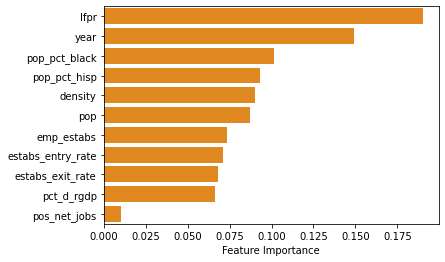

In [27]:
sns.barplot(data = df_plot,
           x = 'Feature Importance',
           y = df_plot.index,
           color = 'darkorange')

plt.show()

************
# Comparison
[TOP](#Random-Forest)

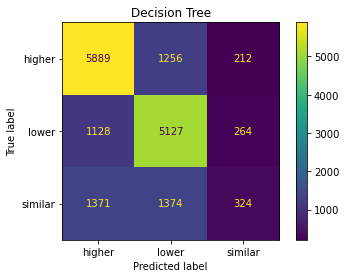

In [29]:
sk_fig = plot_confusion_matrix(clf_dtc, x_test, y_test)
plt.title('Decision Tree')

plt.show()

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.3s finished


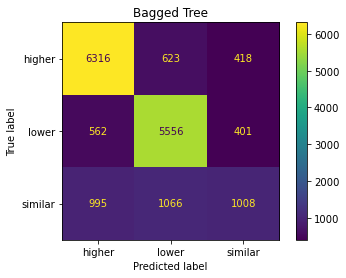

In [30]:
sk_fig = plot_confusion_matrix(clf_bag_tree, x_test, y_test)
plt.title('Bagged Tree')

plt.show()

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:    0.3s finished


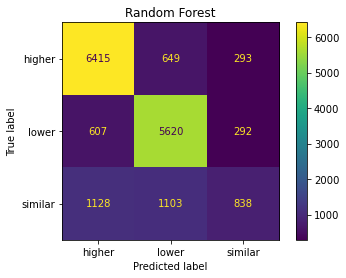

In [31]:
sk_fig = plot_confusion_matrix(clf_rf, x_test, y_test)
plt.title('Random Forest')

plt.show()

********************
# `sklearn` is pretty cool

So, check this out!

In [33]:
classifiers = [DecisionTreeClassifier(max_leaf_nodes = best_dtc ['max_leaf_nodes']),
              BaggingClassifier(n_estimators = 100,
                               random_state = 490,
                               n_jobs = 10),
              RandomForestClassifier(n_estimators = 100,
                                    max_features = 'sqrt',
                                    random_state = 490,
                                    n_jobs = 10)]

In [35]:
%%time
for clf in classifiers:
    clf.fit(x_train, y_train)

Wall time: 8.95 s


In [52]:
fig, ax = plt.subplots(nrows = 1, ncols = 3,
                      figsize = (16, 4))
plt.close()

In [53]:
type(ax)
type(ax).__name__
ax.shape
ax[0]
ax
ax.flatten()
ax == ax.flatten()

array([ True,  True,  True])

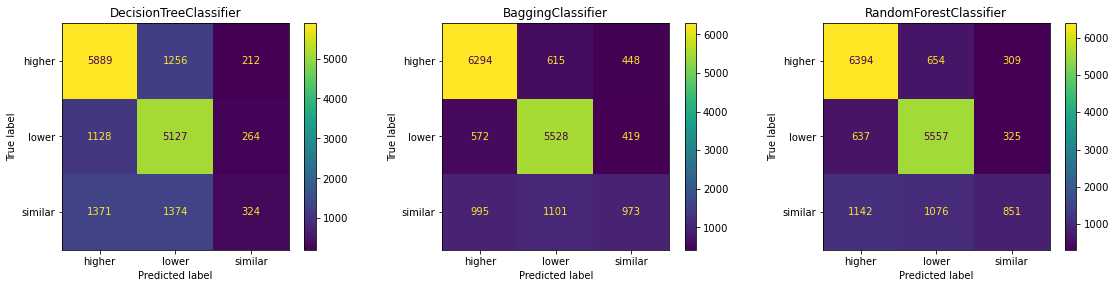

In [55]:
_, ax = plt.subplots(nrows = 1, ncols = 3,
                      figsize = (16, 4))

for clf, axis in zip(classifiers, ax.flatten()):
    plot_confusion_matrix(clf,
                         x_test, 
                         y_test, 
                         ax = axis)
    axis.title.set_text(type(clf).__name__)
    
plt.tight_layout()